# Node2Vec

In [1]:
"""
@author: vatsal
"""

import networkx as nx
import pandas as pd
import random
import matplotlib.pyplot as plt

from node2vec import Node2Vec as n2v
from itertools import combinations, groupby

## Generate Data

## Create Graph

In [2]:
def generate_graph(n, p, dt = nx.MultiGraph()):
    '''
    This function will generate a graph G based on the users input parameters
    
    params:
        n (Integer) : The number of nodes you would like in the graph
        p (Float) : The probability of adding an edge between nodes
        dt (Function) : The type of the graph you want to create
    '''
    edges = combinations(range(n), 2)
    G = dt
    G.add_nodes_from(range(n))
    
    if p <= 0:
        return G
    elif p >= 1:
        return nx.complete_graph(n, create_using = G)
    else:
        for _, ne in groupby(edges, key = lambda x : x[0]):
            ne = list(ne)
            re = random.choice(ne)
            G.add_edge(*re)
            for e in ne:
                if random.random() < p:
                    G.add_edge(*e)
    return G

In [3]:
G = generate_graph(n = 1000, p = 0.2, dt = nx.MultiGraph())

In [4]:
print(nx.info(G))

Name: 
Type: MultiGraph
Number of nodes: 1000
Number of edges: 101175
Average degree: 202.3500


## Node2Vec

**Parameter Info**  
- graph: a graph g, where all nodes must be integers or strings  
- dimensions: embedding dimensions (default: 128)  
- walk_length: number of nodes in each walk (default: 80)  
- num_walks: number of walks per node (default: 10)  
- weight_key: the key for the weight attribute on weighted graphs (default: 'weight')  
- workers: number of workers for parallel execution (default: 1)

Node2Vec.fit method: Accepts any key word argument acceptable by gensim.Word2Vec

In [5]:
%time g_emb = n2v(G, dimensions=16, weight_key='weight')

Computing transition probabilities:   0%|          | 0/1000 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:27<00:00,  2.76s/it]

CPU times: user 2min 4s, sys: 1.38 s, total: 2min 6s
Wall time: 2min 7s


In [6]:
WINDOW = 1 # Node2Vec fit window
MIN_COUNT = 1 # Node2Vec min. count
BATCH_WORDS = 4 # Node2Vec batch words

In [7]:
mdl = g_emb.fit(
    window=WINDOW,
    min_count=MIN_COUNT,
    batch_words=BATCH_WORDS
)

## Convert to DataFrame

In [8]:
emb_df = (
    pd.DataFrame(
        [mdl.wv.get_vector(str(n)) for n in G.nodes()],
        index = G.nodes
    )
)

In [9]:
emb_df.iloc[:,1:]

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.447684,0.011902,0.105182,0.423308,0.041917,0.253975,-0.158720,-0.249613,0.219122,-0.236945,-0.688231,0.634782,0.177383,0.703375,0.866337
1,0.298273,0.338018,0.239846,0.672741,0.021200,0.110744,-0.366014,-0.902203,0.088362,0.450594,0.253599,0.614570,-0.365115,0.397191,0.283971
2,0.105705,-0.254472,0.657703,0.129948,0.465816,0.374454,-0.128367,-0.321824,-0.489336,-0.354999,0.133337,-0.208740,-0.057268,0.448898,0.728145
3,-0.158674,0.247631,0.311516,0.621764,0.528336,-0.483104,-0.100635,-0.339950,0.342019,0.419711,0.060602,-0.181430,0.017490,0.201038,0.420852
4,-0.619447,-0.298463,0.054491,0.511853,0.503368,-0.100878,-0.528908,0.046738,-0.077342,0.510184,-0.325671,0.096050,-0.267053,1.235905,0.091948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.137689,-0.379294,0.715981,0.659966,0.198017,-0.133022,0.196403,-0.230645,0.316216,0.043188,-0.617628,-0.683840,-0.813172,-0.484542,0.601499
996,0.242243,-0.523997,0.687770,0.039348,0.286732,0.059742,0.170888,-0.454056,-0.172456,0.051907,0.086089,-0.070928,-0.321144,0.690540,0.375130
997,0.720454,-0.614276,0.770633,0.229515,0.083094,-0.255641,-0.289503,-0.141286,0.297977,-0.423074,-0.084720,-0.284702,-0.377311,0.396039,0.569815
998,-0.110148,-0.123362,0.084544,0.538675,0.297475,-0.712419,0.571973,-0.452450,-0.418324,0.590873,-0.372670,0.461144,-0.253952,0.695156,0.678124


### Visualize Embedding

<Figure size 432x288 with 0 Axes>

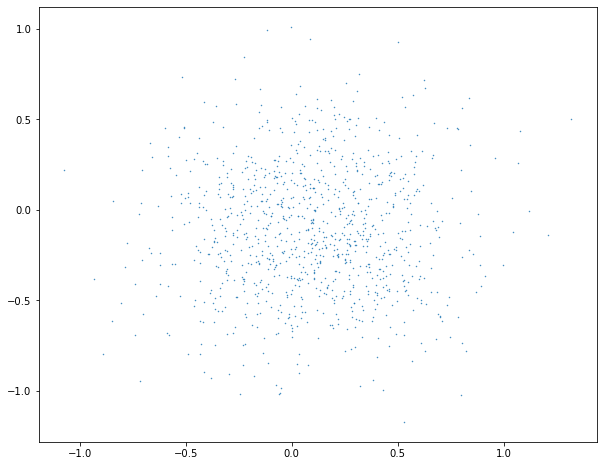

In [10]:
plt.clf()
fig=plt.figure(figsize=(10,8))
plt.scatter(
    x = emb_df.iloc[:,0],
    y = emb_df.iloc[:,1],
    s = 0.2
)
plt.show()
